In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train.shape

(455, 30)

In [ ]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
y_train.shape

(455,)

In [ ]:
import torch

In [ ]:
x_train_tensor=torch.from_numpy(x_train)
x_test_tensor=torch.from_numpy(x_test)
y_train_tensor=torch.from_numpy(y_train)
y_test_tensor=torch.from_numpy(y_test)

In [ ]:
float64=torch.float64

In [ ]:
class MySimpleNN(nn.Module):
  def __init__(self):
    super(MySimpleNN, self).__init__()

    self.network=nn.Sequential(
        nn.Linear(30,1),
        nn.Sigmoid()

    )
  def forward(self,x):
    out=self.network(x)

    return out


In [ ]:
learning_rate=0.1
epochs=25

In [ ]:
loss_function=nn.BCELoss()

In [ ]:
x_train_tensor = x_train_tensor.float()
y_train_tensor = y_train_tensor.float()


In [ ]:
model=MySimpleNN()
model=model.float()
loss_function=nn.BCELoss()

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for  i in range(epochs):
  model=model.float()

  y_pred=model(x_train_tensor)

  loss=loss_function(y_pred,y_train_tensor.reshape(-1,1))

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  print(f'epoch{i+1},loss:{loss}')



epoch1,loss:0.7943244576454163
epoch2,loss:0.7708085179328918
epoch3,loss:0.7486611008644104
epoch4,loss:0.7278161644935608
epoch5,loss:0.7082048654556274
epoch6,loss:0.6897572875022888
epoch7,loss:0.6724029779434204
epoch8,loss:0.6560721397399902
epoch9,loss:0.6406962871551514
epoch10,loss:0.6262093186378479


In [ ]:
import torch
import torch.nn as nn

# Define the neural network class
class MySimpleNN(nn.Module):
    def __init__(self):
        super(MySimpleNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(30, 1),  # Input size = 30, Output size = 1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Instantiate the model
model = MySimpleNN()

# Ensure model parameters are in float
model = model.float()

# Define a loss function and optimizer
loss_function = nn.BCELoss()  # Binary Cross-Entropy Loss for sigmoid output
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Example data for training (replace with your actual data)
# Explicitly set dtype to torch.float


# Define training epochs
epochs = 10

# Training loop
for i in range(epochs):
    # Forward pass: predict using the model
    y_pred = model(x_train_tensor)

    # Compute loss
    loss = loss_function(y_pred, y_train_tensor)

    # Zero gradients before backward pass
    optimizer.zero_grad()

    # Backward pass: compute gradients
    loss.backward()

    # Update weights
    optimizer.step()

    # Print epoch and loss
    print(f'Epoch {i + 1}, Loss: {loss.item()}')


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [ ]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5897198915481567


In [ ]:
import torch.nn as nn

class Model(nn.Module):
  def __init__(self,num_features):

    super().__init__()
    self.linear=nn.Linear(num_features,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,features):
    out=self.linear(features)
    out=self.sigmoid(out)

    return out




In [ ]:
features=torch.rand(10,5)
model=Model(features.shape[1])
model(features)

tensor([[0.6427],
        [0.5693],
        [0.6421],
        [0.6655],
        [0.6054],
        [0.6382],
        [0.6189],
        [0.6011],
        [0.5515],
        [0.6609]], grad_fn=<SigmoidBackward0>)

In [ ]:
model.linear.bias

Parameter containing:
tensor([0.0406], requires_grad=True)

In [ ]:
from torchinfo import summary

In [ ]:
!pip install torchinfo

In [ ]:
model.linear.weight

Parameter containing:
tensor([[0.0140, 0.1035, 0.4168, 0.0896, 0.1913]], requires_grad=True)

In [ ]:
summary(model,input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(3,3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )
  def forward(self,x):
      out=self.linear_relu_stack(x)

      return out

In [ ]:
x=torch.rand(5,3)
model=NeuralNetwork()
out=model(x)
print(out)

tensor([[0.4387],
        [0.4333],
        [0.4350],
        [0.4396],
        [0.4363]], grad_fn=<SigmoidBackward0>)


In [ ]:
import torch
import torch.nn as nn

# Define the NeuralNetwork class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define a sequential model
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, 3),  # Input dimension set to 3
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()  # Corrected capitalization for nn.Sigmoid
        )

    def forward(self, x):
        # Define the forward pass
        out = self.linear_relu_stack(x)
        return out

# Input tensor with size (5, 3)
x = torch.rand(5, 3)

# Instantiate the model
model = NeuralNetwork()

# Perform a forward pass
out = model(x)
print(out)


tensor([[0.4343],
        [0.4357],
        [0.4207],
        [0.4098],
        [0.4496]], grad_fn=<SigmoidBackward0>)


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 9.45MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.87MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.6MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
print(type(train_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [ ]:
len(train_data)

60000

torch.Size([1, 28, 28])
9


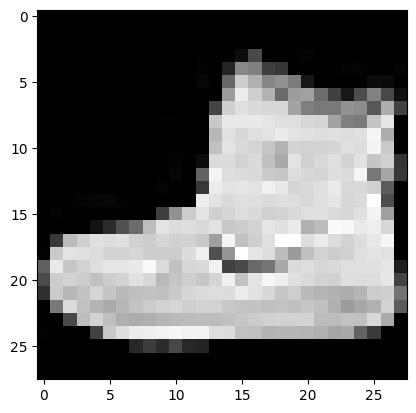

In [ ]:
image,label=train_data[0]
print(image.shape)
plt.imshow(image.squeeze(),cmap='gray')
print(label)

In [ ]:
n=len(train_data)

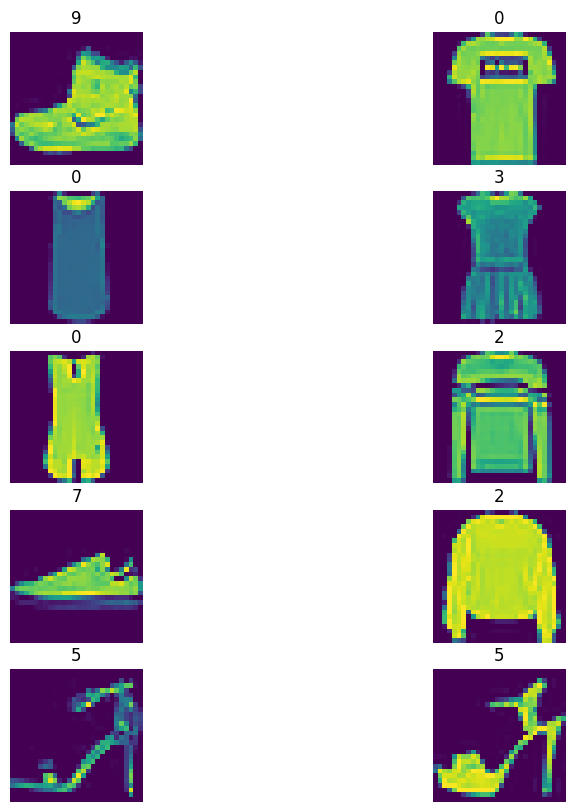

In [ ]:

plt.figure(figsize=(10, 10))  # Create a single figure for all subplots
for i in range(10):
    image, label = train_data[i]
    plt.subplot(5, 2, i + 1)  # Create subplots in a 5x2 grid
    plt.imshow(image.squeeze())  # Add cmap='gray' for grayscale images
    plt.title(label)
    plt.axis('off')

plt.show()




In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
for images, labels in train_loader:  # Correct way to iterate over DataLoader
    print(image)  # Print shape of the images and labels
    print(label)

Streaming output truncated to the last 5000 lines.
          1.0000, 0.9882, 1.0000, 0.5412, 0.1490, 0.6863, 0.9490, 0.6784,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.3490,
          0.8000, 0.0000, 0.0000, 0.0078],
         [0.0000, 0.7725, 0.9412, 0.9412, 0.9294, 0.8588, 0.8706, 0.9569,
          0.9216, 0.9529, 0.9569, 1.0000, 1.0000, 0.9176, 0.9137, 0.1765,
          0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.4118,
          0.7373, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.6471, 0.9922, 0.8784, 0.8980, 0.9490, 0.9569, 0.9098,
          0.9373, 0.9490, 0.9529, 0.9294, 0.9020, 0.9020, 0.8118, 0.0000,
          0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0353, 0.0000, 0.4706,
          0.6471, 0.0000, 0.0314, 0.0000],
         [0.0000, 0.1765, 1.0000, 0.9882, 0.9922, 0.9451, 0.8980, 0.8745,
          0.9020, 0.9216, 0.9412, 0.9373, 0.9137, 0.9608, 0.2549, 0.0000,
          0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0392, 0.0000, 0.5020,
      

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten=nn.Flatten()
    self.network=nn.Sequential(
        nn.Linear(784,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
        nn.LogSoftmax(dim=1)

        )
  def forward(self,x):
    x=self.flatten(x)
    out=self.network(x)
    return out


In [ ]:
import torch.nn as nn

In [ ]:
pip install torchviz


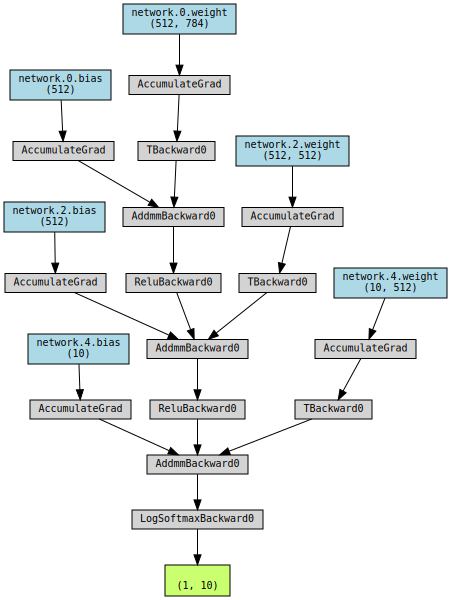

In [ ]:
from torchviz import make_dot
import torch

# Instantiate your model
model = NeuralNetwork()

# Create a dummy input tensor matching the expected input size
dummy_input = torch.randn(1, 1, 28, 28)  # Batch size = 1, single-channel image (28x28)

# Pass the dummy input through the model
output = model(dummy_input)

# Generate the computational graph
dot = make_dot(output, params=dict(model.named_parameters()))

# Display the graph inline in Google Colab
dot.format = "svg"  # Set the format to SVG for inline display
display(dot)  # Directly render in the Colab notebook




In [ ]:
import torch.optim as optim


In [ ]:
model = NeuralNetwork()
loss_function = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        # Forward pass
        y_pred = model(images)

        # Compute loss
        loss = loss_function(y_pred, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.6908391118049622
Epoch [2/10], Loss: 0.6867565512657166
Epoch [3/10], Loss: 0.561115562915802
Epoch [4/10], Loss: 0.32885703444480896
Epoch [5/10], Loss: 0.5590212941169739
Epoch [6/10], Loss: 0.5974716544151306
Epoch [7/10], Loss: 0.4657318592071533
Epoch [8/10], Loss: 0.8665688633918762
Epoch [9/10], Loss: 0.4397914409637451
Epoch [10/10], Loss: 0.27517783641815186


In [ ]:
test_loader=DataLoader(train_data,batch_size=64,shuffle=True)

In [ ]:
labels.shape

torch.Size([32])

In [ ]:
import torch.nn as nn

In [ ]:
test_loss = 0
correct = 0
total = 0

# No gradients needed during evaluation, so we use torch.no_grad()
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: Get predictions from the model
        pred = model(images)

        # Calculate the loss
        loss = loss_function(pred, labels).item()
        test_loss += loss  # Accumulate the loss

        # Get the predicted class labels
        _, predicted = torch.max(pred, 1)  # pred contains raw output (logits), so we use torch.max to get the predicted class index

        # Calculate the number of correct predictions
        total += labels.size(0)  # Accumulate total number of labels
        correct += (predicted == labels).sum().item()  # Count correct predictions

# Calculate the average test loss
average_test_loss = test_loss / len(test_loader)

# Calculate the accuracy
accuracy = 100 * correct / total

print(f'Average Test Loss: {average_test_loss:.4f}')
print(f'Accuracy: {accuracy:.2f}%')


Average Test Loss: 0.4133
Accuracy: 85.56%


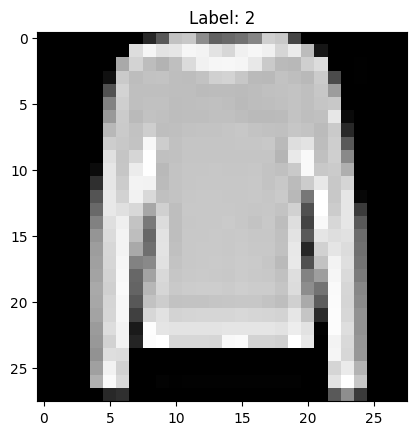

Predicted Class: 2


In [ ]:
import matplotlib.pyplot as plt
import torch

# Pick a single image from the test dataset (for example, the first image in the test set)
single_image, label = test_data[99]  # test_data is the full test dataset (not DataLoader)

# Display the image
plt.imshow(single_image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.show()

# Add batch dimension to the image (as the model expects a batch)
single_image = single_image.unsqueeze(0)  # Shape: [1, 1, 28, 28] (for a single grayscale image)

# Pass the image through the model
model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm)
with torch.no_grad():  # No need for gradients during inference
    output = model(single_image)

# The model output is logits; apply softmax to get probabilities


# Get the predicted class (index of the highest probability)
_, predicted_class = torch.max(output, 1)

# Print the output probabilities and the predicted class

print(f"Predicted Class: {predicted_class.item()}")  # .item() to get the value as a Python integer
